**Table of contents**<a id='toc0_'></a>    
- [Import statements](#toc1_1_)    
- [Loading the datasets](#toc1_2_)    
- [Proportion tests](#toc2_)    
  - [One sample proportion test](#toc2_1_)    
  - [Two sample proportion test](#toc2_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>[Import statements](#toc0_)

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### <a id='toc1_2_'></a>[Loading the datasets](#toc0_)

- The *"late_shipments"* dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part.

In [5]:
late_shipments = pd.read_feather("./datasets/late_shipments.feather")

In [6]:
late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [7]:
late_shipments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   float64
 1   country                   1000 non-null   object 
 2   managed_by                1000 non-null   object 
 3   fulfill_via               1000 non-null   object 
 4   vendor_inco_term          1000 non-null   object 
 5   shipment_mode             1000 non-null   object 
 6   late_delivery             1000 non-null   float64
 7   late                      1000 non-null   object 
 8   product_group             1000 non-null   object 
 9   sub_classification        1000 non-null   object 
 10  vendor                    1000 non-null   object 
 11  item_description          1000 non-null   object 
 12  molecule_test_type        1000 non-null   object 
 13  brand                     1000 non-null   object 
 14  dosage   

In [18]:
late_shipments.product_group.value_counts()

product_group
ARV     583
HRDT    409
ANTM      5
ACT       3
Name: count, dtype: int64

## <a id='toc2_'></a>[Chi-square tests](#toc0_)

The chi-squared tests are statistical tests used to compare observed and expected frequencies of categorical data.

The chi-squared test is based on the chi-squared distribution. The chi-square distribution is a right-skewed distribution that is bounded below by 0. The shape of the chi-square distribution depends on the degrees of freedom. The higher the degrees of freedom, the more symmetric the distribution becomes. Similar to the F-statistic (in ANOVA test) and F-distribution, the chi-square statistic, $X^2$ and the chi-square distribution is always positive. The p-value is the area under the chi-square distribution to the right of the chi-square statistic.

### Chi-square goodness of fit test

A one-sample chi-square test is called a chi-square goodness of fit test. It is used to determine whether sample data are consistent with a hypothesized distribution.

The one-sample proportion test is used to determine whether the proportion of success in a ceategorical variable (i.e, the observed distribution) is equal to some hypothesized proportion of success (i.e., the expected distribution of the population). It is an extreme case of the chi-square goodness of fit test.

In general, the idea of chi-square goodness of fit test expands on the idea of the one-sample proportion test. Instead of comparing the observed proportion of success with the hypothesized proportion of success, we compare the observed frequencies of the categories with the expected frequencies of the categories across a common categorical variable.

For a chi-square goodness of fit test, we create a table that compares the observed frequencies of the categories with the expected frequencies of the categories across a common categorical variable. It is called a contingency table. The cells/rows of the table are the categories of the variable and there is one column for the observed frequencies and one column for the expected frequencies. The expected frequencies are calculated based on the expected distribution of the categories in the general population.

An example of a chi-square goodness of fit test is testing whether the observed distribution of eye colors in a sample of 100 people is consistent with the expected distribution of eye colors in the general population. The contingency table for this example might look like this:

| Eye color | Observed frequency | Expected frequency |
|:----------:|:------------------:|:------------------:|
| Brown      |          30        |         35         |
| Blue       |          30        |         25         |
| Green      |          25        |         20         |
| Hazel      |          15        |         20         |
| **Total**  |         **100**    |        **100**     |

**Note:** the chi-square goodness of fit test requires you to know the population distribution that you are testing the observed data against. If you do not have the population data, then you cannot use the chi-square goodness of fit test.

**The null hypothesis** is that the observed distribution of the categorical variable is consistent with the expected distribution of the categorical variable.

**The alternative hypothesis** is not explicitly stated rather it is implicitly understood from the null hypothesis.

When dealing with counts and investigating how far the observed counts are from the expected counts, we use a **test statistic called the chi-square ($X^2$) statistic.**

The chi-square statistic for the chi-square goodness of fit test is calculated as:

$$ X^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i} $$

Where, 
- $k$ is the number of categories
- $O_i$ is the observed frequency of the $i^{th}$ category 
- $E_i$ is the expected frequency of the $i^{th}$ category

The degrees of freedom for the chi-square goodness of fit test is, $$df = k-1$$


The p-value for the chi-square goodness of fit test is the area under the chi-square distribution to the right of the chi-square statistic, $X^2$.

> Let's see how to perform a chi-square goodness of fit test with an example using the *"late_shipments"* dataset. Let's say we hypothesize that the categories of the product group variable have the following distribution in the general population: ARV = 0.55, HRDT = 0.4, ANTM = 0.03 and ACT = 0.02. We want to test whether the observed distribution of the categories in the "product_group" column is consistent with the hypothesized distribution.

In [35]:
# Create a DataFrame for the Hypothesized/expected distribution
hypothesized = pd.DataFrame({"product_group": ["ARV", "HRDT", "ANTM", "ACT"], "prop": [0.55, 0.4, 0.03, 0.02]})

In [36]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create a column "n" that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

In [37]:
hypothesized

,product_group,prop,n
0,ARV,0.55,550.0
1,HRDT,0.40,400.0
2,ANTM,0.03,30.0
3,ACT,0.02,20.0


In [46]:
# Choose a significance level
alpha = 0.05

In [32]:
# Create a DataFrame for the Observed counts
product_group_counts = pd.DataFrame(late_shipments.product_group.value_counts()).reset_index().rename(columns={"count": "n"})

In [33]:
product_group_counts

,product_group,n
0,ARV,583
1,HRDT,409
2,ANTM,5
3,ACT,3


The chi-square goodness of fit test compares proportions of each level of a categorical variable to hypothesized values. Before running such a test, it can be helpful to visually compare the distribution in the sample to the hypothesized distribution.

Let's create a visualization to see how well the hypothesized counts appear to model the observed counts. The natural way to visualize the counts of a categorical variable is with a bar plot.

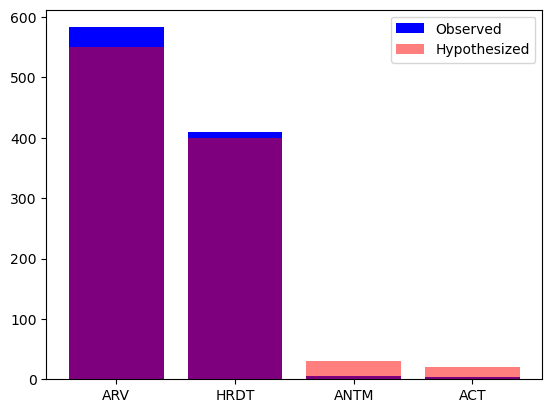

In [45]:
# Plot a blue bar graph of n vs. product_group for the sample counts
plt.bar(product_group_counts['product_group'], product_group_counts['n'], color="blue", label="Observed")

# Add a red bar plot for the hypothesized counts
plt.bar(hypothesized["product_group"], hypothesized["n"], label="Hypothesized", color="red", alpha=0.5)
plt.legend()
plt.show()

We can see that one of the product group is reasonably well-modeled by the hypothesized distribution but the other three appear quite different, but we'll need to run a hypothesis test to see if the difference is statistically significant. 

We can use the `scipy.stats.chisquare` function to perform a chi-square goodness of fit test. The first argument is the observed counts and the second argument is the expected counts. The function returns the chi-square statistic and the p-value.

In [47]:
from scipy.stats import  chisquare

In [48]:
# Perform a goodness of fit test on the product group counts n
gof_test = chisquare(f_obs=product_group_counts["n"], f_exp=hypothesized["n"])

# Print gof_test results
gof_test

Power_divergenceResult(statistic=37.465833333333336, pvalue=3.6670356075536226e-08)

In [51]:
chi_stat, p = gof_test

In [52]:
p < alpha

True

Since the p-value is less than specified significance level of 0.05, we reject the null hypothesis and conclude that the observed distribution of the product group variable is not consistent with the hypothesized distribution.

### The chi-square test of independence